In [1]:
import graphviz
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from dmba import plotDecisionTree, classificationSummary, regressionSummary

%matplotlib inline   
import matplotlib.pylab as plt

1. Upload, explore, clean, and preprocess data for classification tree.

a. Create a flight_df data frame by uploading the original data set into Python. 

In [2]:
try:
    flight_df = pd.read_csv('FlightDelays.csv')
except:
    print('FlightDelays.csv is not in the present working directory')

In [3]:
# Determine and present in this report the data frame dimensions, i.e., number of rows and columns.
print(f'The dimensions of the Flight Delays dataset is {flight_df.shape}')
print(f'{flight_df.shape[0]} rows and {flight_df.shape[1]} columns.')

The dimensions of the Flight Delays dataset is (2201, 11)
2201 rows and 11 columns.


b. Remove ‘DEST’ and ‘ORIGIN’ variables from the flight_df data frame. Then, display the
column data types in flight_df, provide and briefly explain them in your report.

In [4]:
flight_df = flight_df.drop(['DEST','ORIGIN'], axis=1)

In [5]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SCH_TIME   2201 non-null   int64 
 1   CARRIER    2201 non-null   object
 2   DEP_TIME   2201 non-null   int64 
 3   DISTANCE   2201 non-null   int64 
 4   FL_NUM     2201 non-null   int64 
 5   WEATHER    2201 non-null   int64 
 6   WK_DAY     2201 non-null   int64 
 7   MTH_DAY    2201 non-null   int64 
 8   FL_STATUS  2201 non-null   object
dtypes: int64(7), object(2)
memory usage: 154.9+ KB


Explaination: After removing the DEST and ORIGIN fields from the Flight Delays dataset there are 9 variables left that describe flights. CARRIER and FL_STATUS are of type 'object' and exibit catergories and the rest of the variables are of type 'int64' and are listed as follows: 'SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY', 'MTH_DAY'.

c. You leave the outcome variable ‘FL_STATUS’ unchanged in flight_df. However, for the
‘CARRIER’ predictor variable, you need to convert it into binary variables. For that, change
the ‘CARRIER’ data type from ‘object’ to ‘category’, and then convert this categorical
variable into dummy variables. Display in Python the modified column data types and
provide them in your report.

In [6]:
flight_df.CARRIER = flight_df.CARRIER.astype('category')

In [7]:
flight_df = pd.get_dummies(flight_df, columns=['CARRIER'], prefix_sep='_', drop_first=True)

In [8]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SCH_TIME    2201 non-null   int64 
 1   DEP_TIME    2201 non-null   int64 
 2   DISTANCE    2201 non-null   int64 
 3   FL_NUM      2201 non-null   int64 
 4   WEATHER     2201 non-null   int64 
 5   WK_DAY      2201 non-null   int64 
 6   MTH_DAY     2201 non-null   int64 
 7   FL_STATUS   2201 non-null   object
 8   CARRIER_DH  2201 non-null   uint8 
 9   CARRIER_DL  2201 non-null   uint8 
 10  CARRIER_MQ  2201 non-null   uint8 
 11  CARRIER_OH  2201 non-null   uint8 
 12  CARRIER_RU  2201 non-null   uint8 
 13  CARRIER_UA  2201 non-null   uint8 
 14  CARRIER_US  2201 non-null   uint8 
dtypes: int64(7), object(1), uint8(7)
memory usage: 152.7+ KB


d. Display in Python and provide in your report the first 10 records of the modified flight_df
data frame. Briefly explain the outcome and predictors in this case.

In [9]:
flight_df.head(10)

,SCH_TIME,DEP_TIME,DISTANCE,FL_NUM,WEATHER,WK_DAY,MTH_DAY,FL_STATUS,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,1455,1455,184,5935,0,4,1,ontime,0,0,0,1,0,0,0
1,1640,1640,213,6155,0,4,1,ontime,1,0,0,0,0,0,0
2,1245,1245,229,7208,0,4,1,ontime,1,0,0,0,0,0,0
3,1715,1709,229,7215,0,4,1,ontime,1,0,0,0,0,0,0
4,1039,1035,229,7792,0,4,1,ontime,1,0,0,0,0,0,0
5,840,839,228,7800,0,4,1,ontime,1,0,0,0,0,0,0
6,1240,1243,228,7806,0,4,1,ontime,1,0,0,0,0,0,0
7,1645,1644,228,7810,0,4,1,ontime,1,0,0,0,0,0,0
8,1715,1710,228,7812,0,4,1,ontime,1,0,0,0,0,0,0
9,2120,2129,228,7814,0,4,1,ontime,1,0,0,0,0,0,0


In [10]:
flight_df.columns

Index(['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY',
       'MTH_DAY', 'FL_STATUS', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
       'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US'],
      dtype='object')

Explaination: The outcome that we will predicting in this work is whether or not a flight status is delayed or ontime based on the following predictors: scheduled time, departure time, distance of the flight, weather presence, which day of the week it is, which month it is, which carrier is performing the flight, and the flight number. 

2. Develop a classification tree for the Flight Delays case.

a. Develop in Python the predictor variables (14 variables) and outcome variable
(‘FL_STATUS’), partition the data set (70% for training and 30% for validation partitions).

In [11]:
predictors = ['SCH_TIME', 'DEP_TIME', 'DISTANCE', 'FL_NUM', 'WEATHER', 'WK_DAY',
              'MTH_DAY', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
              'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US']
target = 'FL_STATUS'

In [12]:
X = flight_df[predictors]
y = flight_df[target]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
"""
Train a classification tree model using DecisionTreeClassifier() with the training data set
and the following tree control parameters: 
    (a) maximum depth (number of split levels) equals 5; 
    (b) minimum impurity decrease per split of 0.001;
    (c) minimum number of node records (samples) to split equals to 10. 
    
    Use plotDecisionTree() with the feature_names and class_names parameters to display the classification tree in Python 
    and present it in your report.
"""
classTree = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001, min_samples_split=10)
classTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001,
                       min_samples_split=10)

Full Classification Tree after All Splits


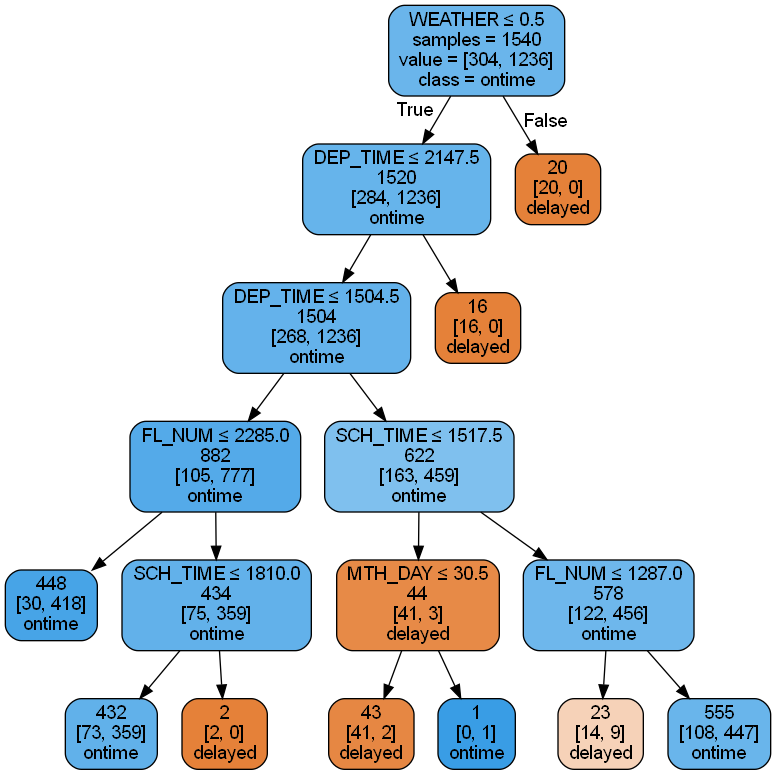

In [14]:
print('Full Classification Tree after All Splits')
plotDecisionTree(classTree, feature_names=X.columns, class_names=classTree.classes_)

b. Using the classification tree, explain the classification outcome (‘FL_STATUS’) of a flight if
the weather (‘WEATHER’) is in good flying condition, departure time (‘DEP_TIME’) is 1605
(4:05 pm), scheduled time (‘SCH_TIME’) is 1510 (3:10 pm), and the flight happens on the
28th day of the month.

Explaination: For a flight with good flight conditions (flying condition = 0) we would first traverse the left side of the decision tree since the first node of the tree splits left if flight condition is <= 0.5. If departure time is at 1605 (4:05 PM) we would continue down the tree to the right node that is at depth 3, which splits on schedule time <= 1517.5. Since the schedule time is 1510 (3:10 pm) which is less, we go left to the node that splits on month day <= 30.5. Since day of the month is 28 and is less, we end at the leaf node that states that this particular flight will be delayed.

c. Identify and display in Python confusion matrices for training and validation partitions.
Present them in your report and comment on accuracy (misclassification) rate for both
partitions and explain if there is a possibility of overfitting.

In [15]:
classificationSummary(train_y, classTree.predict(train_X))

Confusion Matrix (Accuracy 0.8558)

       Prediction
Actual    0    1
     0   93  211
     1   11 1225


In [16]:
classificationSummary(valid_y, classTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8427)

       Prediction
Actual   0   1
     0  39  85
     1  19 518


Explaination: The classification accuracy for the training partition is .8558 and the classification accuracy for the test partition is .8427. Although the predictions on the training partition is higher, the difference is not significant enough to conclude that there is any overfitting taking place. I also calculated the precision and recall for each of these confusion matrixes and there were also no significant differences between these measures convincing that overfitting is not present. 

d. Using the trained classification tree, make classification of flight status (‘delayed’ or
‘ontime’) for the following two new flight records:
Present and briefly explain the classification results in your report.

In [17]:
new_data_flights = pd.DataFrame({
            'SCH_TIME':[1230, 2050],
            'DEP_TIME':[1240, 2105], 
            'DISTANCE':[214, 199], 
            'FL_NUM':[808, 4976], 
            'WEATHER':[1, 0], 
            'WK_DAY':[4, 5],
            'MTH_DAY':[20, 30], 
            'CARRIER_DH':[0, 0], 
            'CARRIER_DL':[0, 1], 
            'CARRIER_MQ':[0, 0],
            'CARRIER_OH':[0, 0],
            'CARRIER_RU':[0, 0], 
            'CARRIER_UA':[1, 0], 
            'CARRIER_US':[0, 0]
})

# Make classifications for new data. 
pred_flights = classTree.predict(new_data_flights)

pred_result = pd.DataFrame({
            'SCH_TIME':[1230, 2050],
            'DEP_TIME':[1240, 2105], 
            'DISTANCE':[214, 199], 
            'FL_NUM':[808, 4976], 
            'WEATHER':[1, 0], 
            'WK_DAY':[4, 5],
            'MTH_DAY':[20, 30], 
            'CARRIER_DH':[0, 0], 
            'CARRIER_DL':[0, 1], 
            'CARRIER_MQ':[0, 0],
            'CARRIER_OH':[0, 0],
            'CARRIER_RU':[0, 0], 
            'CARRIER_UA':[1, 0], 
            'CARRIER_US':[0, 0],
            'Classification': pred_flights,
})
print('New Flight Data and Classifications for New Data')
print(pred_result)

New Flight Data and Classifications for New Data
   SCH_TIME  DEP_TIME  DISTANCE  FL_NUM  WEATHER  WK_DAY  MTH_DAY  CARRIER_DH  \
0      1230      1240       214     808        1       4       20           0   
1      2050      2105       199    4976        0       5       30           0   

   CARRIER_DL  CARRIER_MQ  CARRIER_OH  CARRIER_RU  CARRIER_UA  CARRIER_US  \
0           0           0           0           0           1           0   
1           1           0           0           0           0           0   

  Classification  
0        delayed  
1         ontime  


Explaination: When presented with two new data samples, we can see the Classification Tree classified the first sample as delayed and the second as ontime. The first sample has poor weather conditions which may have ended its journey down the classification tree a bit too early since the first split is concerning this variable. The second sample is classified as ontime not only because weather conditions are good but also because its schedule time, department time, and flight number were the right values that lead to an ontime leaf.

3. Apply grid search and ensemble trees to improve classification results.

a. Use the GridSearchCV() algorithm in Python to improve (optimize) the classification tree
control parameters. Do not use the initial guess grid search, and directly apply the
improved grid search. Provide in your report the improved parameters and display in
Python the associated classification tree. Display the confusion matrices for training and
validation partitions for the improved classification tree.

In [18]:
"""
Consider the following control parameters: 
    (a) maximum depth (number of split levels) in the range from 2 to 25
    (b) minimum impurity decrease per split of 0, 0.0005, and 0.001
    (c) minimum number of node records (samples) to split in the range from 5 to 20.
"""
# Start with initial guess for parameters.
param_grid = {
    'max_depth': list(range(2, 26)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 21)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() initial parameters. cv=5 means that
# 5-fold cross-validation is used in this case, and n_jobs=-1 
# means that the availalbe computer memory (CPU) will be 
# used to make calculations faster. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)

gridSearch_init.fit(train_X, train_y)

# Display best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.8831
Initial parameters:  {'max_depth': 17, 'min_impurity_decrease': 0.001, 'min_samples_split': 7}


In [19]:
optTree = DecisionTreeClassifier(max_depth=18, min_impurity_decrease=0.001, min_samples_split=7)
optTree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=18, min_impurity_decrease=0.001,
                       min_samples_split=7)

Full Classification Tree after All Splits


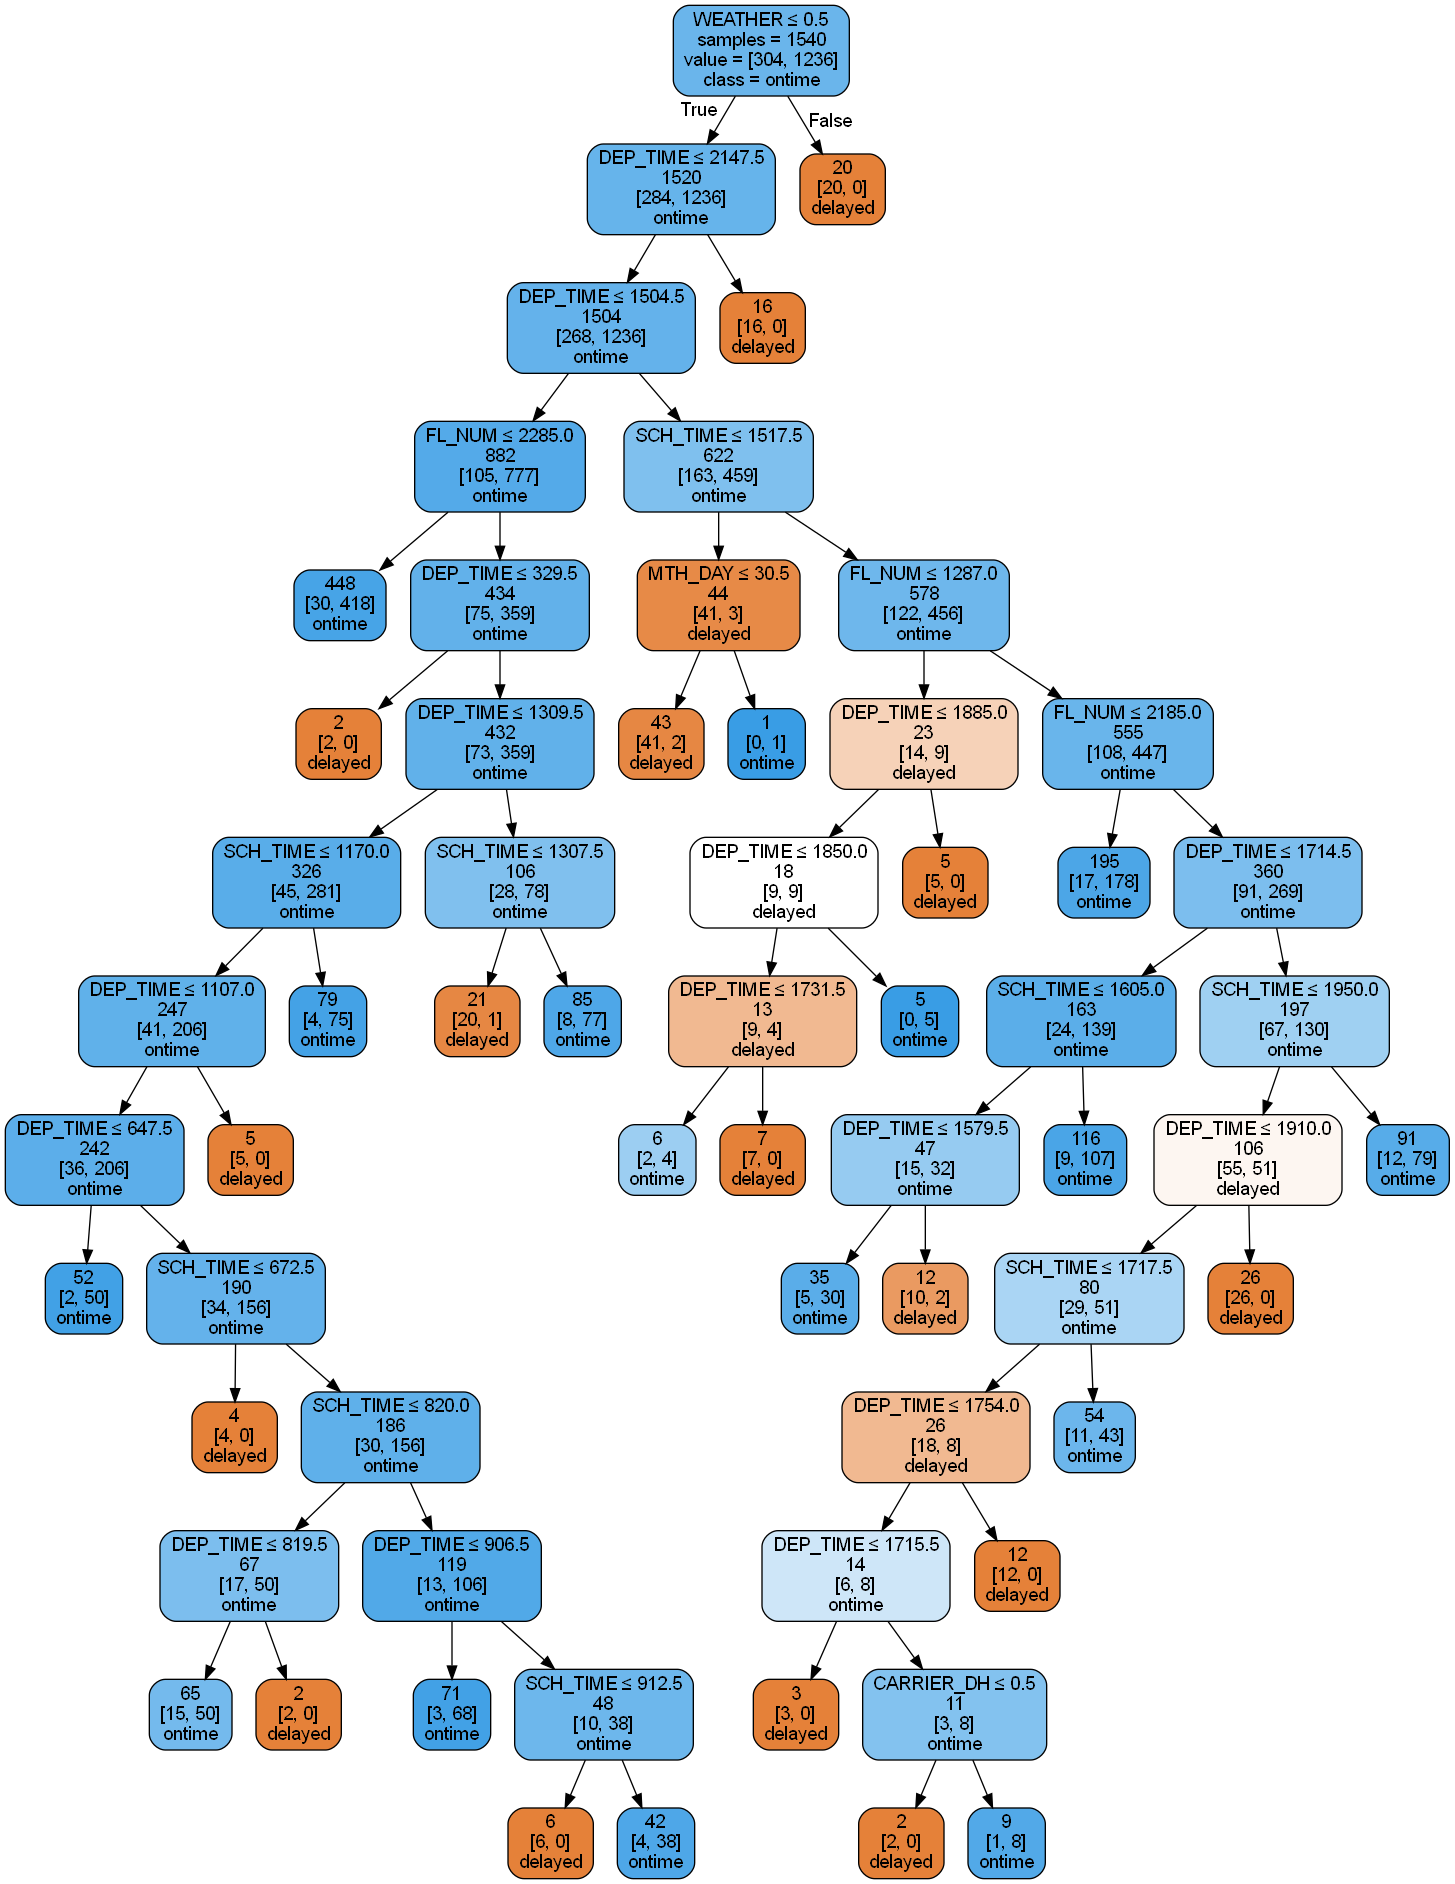

In [20]:
print('Full Classification Tree after All Splits')
plotDecisionTree(optTree, feature_names=X.columns, class_names=classTree.classes_)

In [21]:
classificationSummary(train_y, optTree.predict(train_X))

Confusion Matrix (Accuracy 0.9169)

       Prediction
Actual    0    1
     0  181  123
     1    5 1231


In [22]:
classificationSummary(valid_y, optTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8941)

       Prediction
Actual   0   1
     0  69  55
     1  15 522


b. Present and compare in your report the validation confusion matrices for the
classification results in questions 2b and 3a. Using the accuracy value (misclassification
rate), which classification tree model would you recommend using for making predictions
of the flight status (‘delayed’ or ‘ontime’)? Briefly explain your answer. 

In [23]:
classificationSummary(valid_y, optTree.predict(valid_X))

Confusion Matrix (Accuracy 0.8941)

       Prediction
Actual   0   1
     0  69  55
     1  15 522
